In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import os
import pandas as pd
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from tqdm import tqdm
import numpy as np
import re, math

# Define a similarity between transcription and real text

## Jaccard similarity

In [5]:
def get_jaccard_sim(str1, str2): 
    a = set(str1.split()) 
    b = set(str2.split())
    c = a.intersection(b)
    return float(len(c)) / (len(a) + len(b) - len(c))

### Cosine similarity: opzione 2

In [6]:
WORD = re.compile(r'\w+')

def get_cosine(vec1, vec2):
    intersection = set(vec1.keys()) & set(vec2.keys())
    numerator = sum([vec1[x] * vec2[x] for x in intersection])

    sum1 = sum([vec1[x]**2 for x in vec1.keys()])
    sum2 = sum([vec2[x]**2 for x in vec2.keys()])
    denominator = math.sqrt(sum1) * math.sqrt(sum2)

    if not denominator:
        return 0.0
    else:
        return float(numerator) / denominator

def text_to_vector(text):
    words = WORD.findall(text)
    return Counter(words)

# Compute similarity between real text and transcription

In [13]:
def select_reliable_trans(orig_csv_path, dest_csv_path, transcriber):
    orig_db = pd.read_csv(orig_csv_path)
    selected_db = pd.DataFrame(columns=orig_db.columns)

    for index, row in tqdm(orig_db.iterrows(), total = orig_db.shape[0]):
        orig_name = row['path'].split('/')[-1].replace('.flac', '')
        real_text_path = row['transcription_path']
        with open(real_text_path) as f:
            content = f.readlines()
        real_text = []
        for rr in content:
            splitted = rr.split(' ')
            if splitted[0] == orig_name:
                real_text = ' '.join(splitted[1:])
                break
        real_text = real_text.lower().rstrip()

        trans_path = row['path'].replace('dataset', transcriber)
        trans_path = trans_path.replace(trans_path.split('.')[-1], 'txt')
        with open(trans_path, "r") as text_file:
            transcription = text_file.read()

        sim = get_jaccard_sim(transcription, real_text)
    
        if sim > 0.975:
            selected_db = selected_db.append(row, ignore_index=True)

    selected_db.to_csv(dest_csv_path, index=False)
    return

## Check histograms

In [30]:
orig_csv_path = in_csv_path
transcriber = 'sphinx'

orig_db = pd.read_csv(orig_csv_path)
selected_db = pd.DataFrame(columns=orig_db.columns)
sim_list = []
for index, row in tqdm(orig_db.iterrows(), total = orig_db.shape[0]):
    orig_name = row['path'].split('/')[-1].replace('.flac', '')
    real_text_path = row['transcription_path']
    with open(real_text_path) as f:
        content = f.readlines()
    real_text = []
    for rr in content:
        splitted = rr.split(' ')
        if splitted[0] == orig_name:
            real_text = ' '.join(splitted[1:])
            break
    real_text = real_text.lower().rstrip()

    trans_path = row['path'].replace('dataset', transcriber)
    trans_path = trans_path.replace(trans_path.split('.')[-1], 'txt')
    with open(trans_path, "r") as text_file:
        transcription = text_file.read()

    sim = get_jaccard_sim(transcription, real_text)

    if sim > 0.975:
        selected_db = selected_db.append(row, ignore_index=True)
    sim_list.append(sim)


 37%|███▋      | 10511/28539 [00:15<00:28, 625.61it/s]


 74%|███████▎  | 21043/28539 [00:31<00:11, 651.30it/s]


100%|██████████| 28539/28539 [00:42<00:00, 803.96it/s]

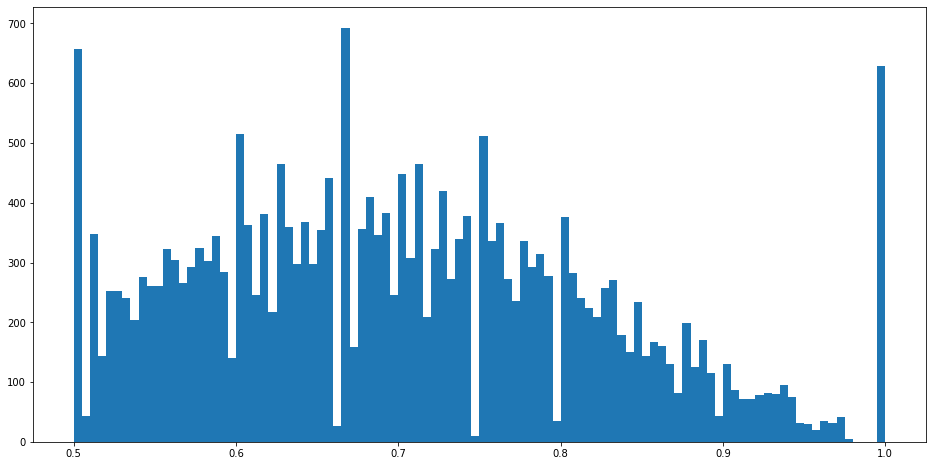

In [35]:
plt.figure(figsize=(16, 8))
plt.hist(sim_list, 100, range=(0.5, 1))
plt.show()

## Run from here

In [22]:
in_csv_path = '../csv/train-clean-100.csv'
out_csv_path = '../csv/train-clean-100_sel.csv'
transcriber = 'sphinx'

In [23]:
select_reliable_trans(in_csv_path, out_csv_path, transcriber)


 69%|██████▊   | 19571/28539 [00:30<00:15, 563.22it/s]


100%|██████████| 28539/28539 [00:45<00:00, 626.40it/s]

In [40]:
a = pd.read_csv('../csv/test-clean_sel.csv')

In [41]:
a

,reader,book,librispeech_folder,path,transcription_path,SNR,noise_type
0,6930,75918,test-clean,/nas/home/cborrelli/speech_forensics/dataset/t...,/nas/home/cborrelli/speech_forensics/dataset/t...,inf,NaN
1,6930,76324,test-clean,/nas/home/cborrelli/speech_forensics/dataset/t...,/nas/home/cborrelli/speech_forensics/dataset/t...,inf,NaN
2,6930,76324,test-clean,/nas/home/cborrelli/speech_forensics/dataset/t...,/nas/home/cborrelli/speech_forensics/dataset/t...,inf,NaN
3,6930,81414,test-clean,/nas/home/cborrelli/speech_forensics/dataset/t...,/nas/home/cborrelli/speech_forensics/dataset/t...,inf,NaN
4,6930,81414,test-clean,/nas/home/cborrelli/speech_forensics/dataset/t...,/nas/home/cborrelli/speech_forensics/dataset/t...,inf,NaN
5,6930,81414,test-clean,/nas/home/cborrelli/speech_forensics/dataset/t...,/nas/home/cborrelli/speech_forensics/dataset/t...,inf,NaN
6,1320,122617,test-clean,/nas/home/cborrelli/speech_forensics/dataset/t...,/nas/home/cborrelli/speech_forensics/dataset/t...,inf,NaN
7,1320,122612,test-clean,/nas/home/cborrelli/speech_forensics/dataset/t...,/nas/home/cborrelli/speech_forensics/dataset/t...,inf,NaN
8,5639,40744,test-clean,/nas/home/cborrelli/speech_forensics/dataset/t...,/nas/home/cborrelli/speech_forensics/dataset/t...,inf,NaN
9,5639,40744,test-clean,/nas/home/cborrelli/speech_forensics/dataset/t...,/nas/home/cborrelli/speech_forensics/dataset/t...,inf,NaN
